In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fama_french.csv')
df.head()

,date,gm,adbe,ora,flo,mkt_rf,smb,hml,rf
0,2012-10-01,0.120879,0.049014,0.014934,-0.024281,-0.0176,-0.0116,0.0359,0.0001
1,2012-11-01,0.014902,0.017044,-0.032055,0.195531,0.0078,0.0064,-0.0084,0.0001
2,2012-12-01,0.113988,0.088703,0.046689,-0.004530,0.0118,0.0150,0.0351,0.0001
3,2013-01-01,-0.025668,0.003981,0.102697,0.155135,0.0557,0.0033,0.0096,0.0000
4,2013-02-01,-0.033464,0.039122,-0.038570,0.048363,0.0129,-0.0028,0.0011,0.0000


In [3]:
r_f = df['rf'].values
r_gm = df['gm'].values - r_f
r_adbe = df['adbe'].values - r_f
r_ora = df['ora'].values - r_f
r_flo = df['flo'].values - r_f
f_m = df['mkt_rf'].values - r_f
f_smb = df['smb'].values - r_f
f_hml = df['hml'].values - r_f

vector_1 = [1]*len(f_m)

In [4]:
R = np.matrix([r_gm, r_adbe, r_ora, r_flo])
R = np.transpose(R)
F = np.matrix([vector_1, f_m, f_smb, f_hml])
F = np.transpose(F)

In [5]:
x1 = np.dot(np.transpose(F), F)
x2 = np.linalg.inv(x1)
x3 = np.dot(x2, np.transpose(F))
B = np.dot(x3,R)
print(B)

[[-1.06497959e-03  8.49300414e-03  1.07187588e-02  5.13442760e-03]
 [ 1.18352022e+00  1.20099540e+00  5.88364414e-01  4.79204767e-01]
 [ 7.19675225e-01 -2.50482193e-01  4.17367996e-01 -2.73426048e-01]
 [ 6.58089536e-01 -5.57412709e-01 -2.28104966e-01  2.54813640e-01]]


In [6]:
sample = {'sample':['alpha', 'beta_1', 'beta_2', 'beta_3'], 'r_gm':[], 'r_adbe':[], 'r_ora':[], 'r_flo':[]}
v = np.array(B)

In [7]:
for i in range(len(v)):
    sample['r_gm'].append(v[i][0])
    sample['r_adbe'].append(v[i][1])
    sample['r_ora'].append(v[i][2])
    sample['r_flo'].append(v[i][3])
sample = pd.DataFrame.from_dict(sample)
sample = sample.set_index('sample')
print(sample)

            r_gm    r_adbe     r_ora     r_flo
sample                                        
alpha  -0.001065  0.008493  0.010719  0.005134
beta_1  1.183520  1.200995  0.588364  0.479205
beta_2  0.719675 -0.250482  0.417368 -0.273426
beta_3  0.658090 -0.557413 -0.228105  0.254814


In [8]:
E_hat = np.array(R) - np.dot(np.array(F),np.array(B))

In [9]:
corr_matrix_e = np.zeros((4,4))
corr_matrix_r = np.zeros((4,4))

In [10]:
alpha = np.transpose(E_hat)
excess = {'e_gm':alpha[0], 'e_adbe':alpha[1], 'e_ora':alpha[2], 'e_flo':alpha[3]}
dh = pd.DataFrame.from_dict(excess)


In [11]:
print(dh['e_gm'].corr(dh['e_gm']))

1.0


In [12]:
#excess correlation matrix
l ='e_gm'
i =0
corr_matrix_e[i][0] = dh[l].corr(dh['e_gm'])
corr_matrix_e[i][1] = dh[l].corr(dh['e_adbe'])
corr_matrix_e[i][2] = dh[l].corr(dh['e_ora'])
corr_matrix_e[i][3] = dh[l].corr(dh['e_flo'])
            

In [13]:
print(corr_matrix_e)
print(corr_matrix_r)

[[1.         0.12806569 0.23815364 0.00887715]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [14]:
#excess correlation matrix
l ='flo'
i = 3
corr_matrix_r[i][0] = df[l].corr(df['gm'])
corr_matrix_r[i][1] = df[l].corr(df['adbe'])
corr_matrix_r[i][2] = df[l].corr(df['ora'])
corr_matrix_r[i][3] = df[l].corr(df['flo'])

In [15]:
E_hat[0]

array([ 0.12765282,  0.07870291,  0.02757861, -0.0333552 ])

In [16]:
mu_vector = []
for i in df.keys():
    if i in ['gm', 'adbe', 'ora', 'flo']:
        mu_vector.append(df[i].mean())
mu_vector = np.matrix(mu_vector)
mu_vector = np.transpose(mu_vector)
mu_vector

matrix([[0.00898283],
        [0.0207307 ],
        [0.01658256],
        [0.00986473]])

In [17]:
dcov = df.copy()
for i in range(len(dcov)):
    dcov['gm'][i] = dcov['gm'][i] - mu_vector[0]
    dcov['adbe'][i] = dcov['adbe'][i] - mu_vector[1]
    dcov['ora'][i] = dcov['ora'][i] - mu_vector[2]
    dcov['flo'][i] = dcov['flo'][i] - mu_vector[3]
cov_matrix_r = np.zeros((4,4))
i = 0
for l in dcov.keys():
    if l in ['gm', 'adbe', 'ora', 'flo']:
        cov_matrix_r[i][0] = dcov[l].cov(dcov['gm'])
        cov_matrix_r[i][1] = dcov[l].cov(dcov['adbe'])
        cov_matrix_r[i][2] = dcov[l].cov(dcov['ora'])
        cov_matrix_r[i][3] = dcov[l].cov(dcov['flo'])
        i += 1

sample = {'':['gm', 'adbe', 'ora', 'flo'], 'gm':[], 'adbe':[], 'ora':[], 'flo':[]}
v = cov_matrix_r
for i in range(len(v)):
    sample['gm'].append(v[i][0])
    sample['adbe'].append(v[i][1])
    sample['ora'].append(v[i][2])
    sample['flo'].append(v[i][3])
sample = pd.DataFrame.from_dict(sample)
sample_Sigma = sample.set_index('')

/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_19135/2450887190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcov['gm'][i] = dcov['gm'][i] - mu_vector[0]
/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_19135/2450887190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcov['adbe'][i] = dcov['adbe'][i] - mu_vector[1]
/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_19135/2450887190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [18]:
#covariance matrix
print(sample_Sigma)

            gm      adbe       ora       flo
                                            
gm    0.007876  0.002681  0.002713  0.001195
adbe  0.002681  0.005464  0.000971  0.000973
ora   0.002713  0.000971  0.006517  0.000922
flo   0.001195  0.000973  0.000922  0.004584


In [19]:
e_vals, e_vectors = np.linalg.eig(cov_matrix_r)
print('Covariance Matrix:')
print(sample_Sigma)
print('mu_vector:')
print(mu_vector)
print('Eigen Values:')
print(e_vals)
print('Eigen Vectors:')
print(e_vectors)

Covariance Matrix:
            gm      adbe       ora       flo
                                            
gm    0.007876  0.002681  0.002713  0.001195
adbe  0.002681  0.005464  0.000971  0.000973
ora   0.002713  0.000971  0.006517  0.000922
flo   0.001195  0.000973  0.000922  0.004584
mu_vector:
[[0.00898283]
 [0.0207307 ]
 [0.01658256]
 [0.00986473]]
Eigen Values:
[0.0117254  0.00341266 0.00420309 0.00509989]
Eigen Vectors:
[[ 0.71899768  0.55471646  0.37986395  0.17616857]
 [ 0.42234415 -0.69509997 -0.05303146  0.57935232]
 [ 0.49612657 -0.35359037 -0.05585857 -0.79101965]
 [ 0.24192184  0.28999919 -0.92183017  0.08719764]]


In [20]:
e_vector_t = np.transpose(e_vectors)
e_vector_t

array([[ 0.71899768,  0.42234415,  0.49612657,  0.24192184],
       [ 0.55471646, -0.69509997, -0.35359037,  0.28999919],
       [ 0.37986395, -0.05303146, -0.05585857, -0.92183017],
       [ 0.17616857,  0.57935232, -0.79101965,  0.08719764]])

In [21]:
R_t = np.transpose(R)
R_t = R_t - mu_vector

In [22]:
Y = np.dot(e_vector_t,R_t)

In [23]:
a = np.squeeze(np.asarray(Y[2]))
b = np.squeeze(np.asarray(Y[3]))
c = np.matrix([a[0:5],b[0:5]])


In [24]:
print(c)

[[ 0.07263941 -0.16592652  0.0479355  -0.15099935 -0.04950779]
 [ 0.03441978  0.05356448  0.03280353 -0.07125895  0.05016119]]


In [25]:
y_3 = np.squeeze(np.asarray(Y[2]))
y_4 = np.squeeze(np.asarray(Y[3]))
epsilon = np.matrix([y_3,y_4])

In [26]:
epsilon[0]

matrix([[ 0.07263941, -0.16592652,  0.0479355 , -0.15099935, -0.04950779,
         -0.15110838,  0.04409378,  0.03301879,  0.00436677, -0.00686736,
          0.0726435 , -0.01625112, -0.1504945 ,  0.15694967,  0.03199358,
         -0.01331848,  0.01020855, -0.05802604,  0.06107609, -0.01495627,
          0.011693  ,  0.07506591, -0.01074469,  0.03306152, -0.03399212,
          0.00834319,  0.04019092, -0.0356382 , -0.0578351 , -0.0401789 ,
         -0.00299593,  0.0097236 ,  0.03134305, -0.04299309, -0.07347756,
         -0.05251906, -0.01940127,  0.14031869,  0.06324747,  0.00205137,
          0.15632697, -0.0479537 , -0.02973005,  0.01806134, -0.02667433,
          0.06308399,  0.18106534, -0.02027887, -0.01334828,  0.04577522,
         -0.2722375 ,  0.01967741,  0.04550995, -0.02179694, -0.01677575,
          0.04977617,  0.07852279, -0.00212512,  0.02434782, -0.03954013,
          0.01330432, -0.03926257,  0.01617234, -0.00186384, -0.06861384,
         -0.06664293, -0.02590222,  0.

In [27]:
#calculate covariance matrix for epsilon
# cov_matrix_epsilon = np.zeros((4,4))
# cov_matrix_epsilon[0][0] = epsilon[0].var()
# cov_matrix_epsilon[0][1] = np.cov(epsilon)
# # cov_matrix_epsilon[1][0] = epsilon[0].cov(epsilon[1])
# cov_matrix_epsilon[1][1] = epsilon[1].var()

In [32]:
covariance_matrix_epsilon = np.cov(epsilon)
print('Covariance Matrix epsion:')
print(covariance_matrix_epsilon)

Covariance Matrix epsion:
[[ 4.20398520e-03 -1.97881714e-06]
 [-1.97881714e-06  5.10019917e-03]]


In [37]:
r_m = df['mkt_rf'].values + r_f

In [43]:
from matplotlib import pyplot as plt 

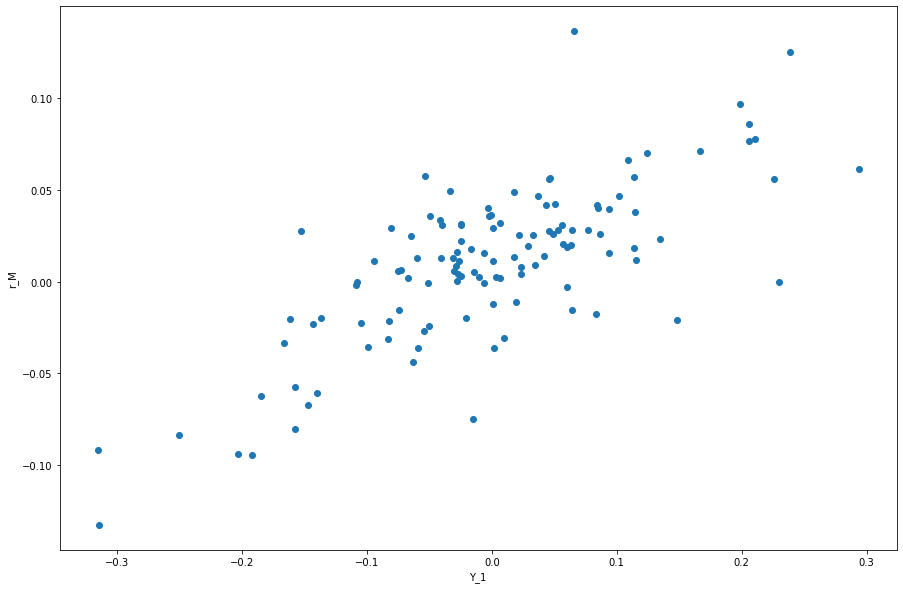

Correlation Matrix:
[[1.        0.7471078]
 [0.7471078 1.       ]]


In [65]:
plt.figure(figsize=(15,10))
plt.scatter(np.asarray(Y[0]), r_m)
plt.xlabel('Y_1')
plt.ylabel('r_M')
plt.show()
corr = np.corrcoef(np.asarray(Y[0]), r_m)
print('Correlation Matrix:')
print(corr)

In [70]:
np.corrcoef(np.asarray(Y[0]), Y[2])

array([[ 1.        , -0.00104609],
       [-0.00104609,  1.        ]])